In [ ]:
import numpy as np
import heapq 
import matplotlib.pyplot as plt

In [ ]:
#heuristics euclidean distance

def heuristics(a,b):
  return np.sqrt((b[0]-a[0])**2 + (b[1]-a[1])**2)

In [ ]:
def astar(array,start,end):
  # to traverse in all 8 directions
  directions=[(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
  closed_list=set()
  came_from={} #to store previous nodes of path
  gscore={start:0}                        # dictionary key : value pairs
  fscore={start:heuristics(start,goal)}  # a dictionary 

  openlist=[] # FRONTIER
  heapq.heappush(openlist,(fscore[start],start)) #priority queue, 
  #in frontier priority by fscore and followed by identir of that fscore

  while openlist:
    current=heapq.heappop(openlist)[1] #fscore wise at index 1 (x,y) coordinate

    if current==goal:
      path_data=[]  # contain entire path 
      while current in came_from:
        path_data.append(current)
        current=came_from[current]
      return path_data

    closed_list.add(current)
    
    for i,j in directions:
      direction= current[0] +i , current[1]+j
      temp_gscore= gscore[current]+heuristics(current,direction)
      if 0<= direction[0]<array.shape[0]:  #corner case to consider boundary row-wise
        if 0<=direction[1]<array.shape[1]: # #corner case to consider boundary column-wise
          if array[direction[0]][direction[1]] ==1 : #obstacle
            continue

        else:
            #column wall
          continue
      else:
        # row wall
        continue
      if direction in closed_list and temp_gscore >= gscore.get(direction,0):
        continue
      
      if temp_gscore <gscore.get(direction,0) or direction not in [i[1] for i in openlist]:
        came_from[direction]=current
        gscore[direction]=temp_gscore
        fscore[direction]= temp_gscore+heuristics(direction,goal)
        heapq.heappush(openlist,(fscore[direction],direction))
  return False #incase no path found


In [4]:
import numpy as np
new_array = np.random.randint(2, size=(50,50))
print("Random set of rows from 2D array array:")
print(new_array)
new_array[0][0]=0
new_array[24][36]=0

Random set of rows from 2D array array:
[[1 0 1 ... 1 1 1]
 [1 0 1 ... 0 1 1]
 [1 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]]


In [ ]:
start=(0,0)
goal=(40,36)

In [ ]:
route=astar(new_array,start,goal)
#print(route)
route= route+[start]

# reverse route to get path from start
route=route[::-1] #step from last to front hence, reverse
print(route)

[(0, 0), (0, 1), (1, 2), (2, 1), (3, 2), (4, 2), (5, 2), (6, 1), (7, 2), (8, 3), (9, 3), (10, 2), (11, 3), (11, 4), (11, 5), (11, 6), (12, 7), (13, 8), (13, 9), (14, 10), (15, 11), (16, 12), (16, 13), (16, 14), (17, 15), (17, 16), (18, 17), (19, 18), (20, 19), (21, 20), (22, 20), (23, 20), (24, 21), (25, 22), (26, 23), (27, 23), (28, 24), (28, 25), (29, 26), (28, 27), (29, 28), (30, 29), (31, 30), (32, 30), (33, 30), (34, 31), (35, 32), (36, 33), (37, 34), (38, 35), (39, 35), (40, 36)]


In [ ]:
x=[]
y=[]

for i in range (0,len(route)):
  x_c=route[i][0]
  y_c=route[i][1]
  x.append(x_c)
  y.append(y_c)

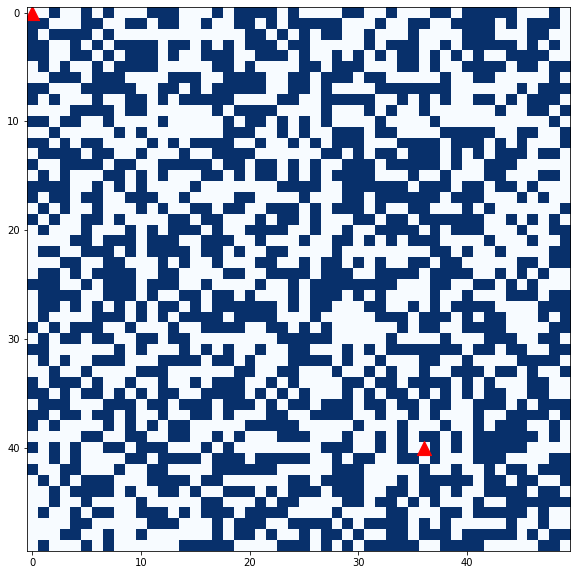

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))

ax.imshow(new_array,cmap="Blues")
ax.scatter(start[1],start[0], marker="^", color="red",s=200)
ax.scatter(goal[1],goal[0],marker="^", color="red", s=200)
plt.show()

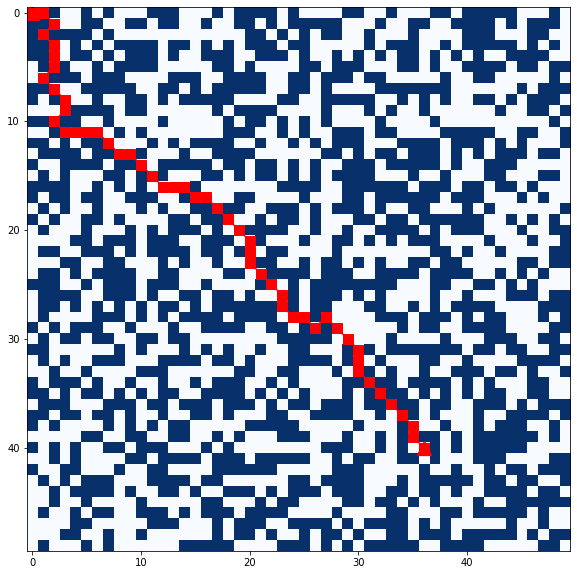

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(new_array,cmap="Blues")
ax.scatter(start[1],start[0], marker="^", color="red",s=200)
ax.scatter(goal[1],goal[0],marker="^", color="red", s=200)
ax.plot(y,x,color="red",marker="s",ms='10')

plt.show()